## **Steps:**

1) Upload *garments.csv*

2) Create a directory named 'train' and upload all images from attached *train* folder 

3) Create a directory named 'test' and upload all images from attached *test* folder 

**Note:** 

1) Created the following:

*   A ML model which can recognize that the picture is a garment
*   A ML model which can identify garment gender
*   A recommendation system for similar style garments.

2) non_garments dataset has been taken from **keras.datasets**

# **Data Pre-processing**

In [ ]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img 
from keras.layers.pooling import MaxPool2D
from keras import losses

In [ ]:
prop = pd.read_csv('/content/garments.csv')
prop.head()

,sno,name,gender
0,1,img_1,female
1,2,img_2,female
2,3,img_3,female
3,4,img_4,male
4,5,img_5,male


In [ ]:
garment_ds = []
for name in prop.name:
  path = '/content/train/' + name + '.jpg'
  full_size_image = plt.imread(path)
  garment_ds.append(cv2.resize(full_size_image, (128,128), interpolation=cv2.INTER_CUBIC))

garment_ds = np.array(garment_ds)
garment_ds.shape

(200, 128, 128, 3)

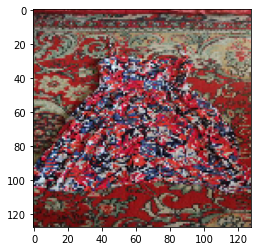

In [ ]:
plt.imshow(garment_ds[0])

In [ ]:
from keras.datasets import cifar10
(a,b),(c,d) = cifar10.load_data()
non_garment_ds = []
for i in range(200):
  non_garment_ds.append(cv2.resize(c[i], (128,128), interpolation=cv2.INTER_CUBIC))

non_garment_ds = np.array(non_garment_ds)
non_garment_ds.shape

(200, 128, 128, 3)

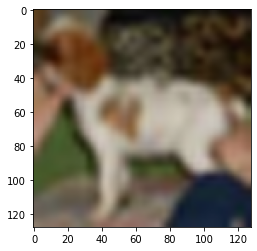

In [ ]:
plt.imshow(non_garment_ds[12])

In [ ]:
dataset = []
for i in range(200):
  dataset.append(garment_ds[i])
  dataset.append(non_garment_ds[i])

dataset = np.array(dataset)
dataset.shape

(400, 128, 128, 3)

In [ ]:
dataset_type = []
for i in range(200):
  dataset_type.append(1) #garment
  dataset_type.append(0) #non_garment

dataset_type = np.array(dataset_type)
dataset_type.shape

(400,)

In [ ]:
#converting into required format

dataset = dataset/255
dataset_type_one_hot = to_categorical(dataset_type)

# **Model to recognize that the picture is a garment**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(dataset, dataset_type_one_hot, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
6/6 [==============================] - 20s 2s/step - loss: 1.4164 - accuracy: 0.5278 - val_loss: 0.8191 - val_accuracy: 0.5000
Epoch 2/5
6/6 [==============================] - 7s 1s/step - loss: 0.6806 - accuracy: 0.6083 - val_loss: 0.6491 - val_accuracy: 0.5000
Epoch 3/5
6/6 [==============================] - 7s 1s/step - loss: 0.5793 - accuracy: 0.6056 - val_loss: 0.5786 - val_accuracy: 0.6250
Epoch 4/5
6/6 [==============================] - 7s 1s/step - loss: 0.4665 - accuracy: 0.7111 - val_loss: 0.4237 - val_accuracy: 0.9500
Epoch 5/5
6/6 [==============================] - 7s 1s/step - loss: 0.3808 - accuracy: 0.8861 - val_loss: 0.3281 - val_accuracy: 0.8750


**Manual Testing:**

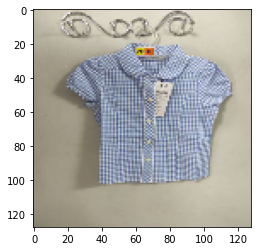

In [ ]:
new_img = plt.imread('/content/test/test_14.jpg')
test=cv2.resize(new_img, (128,128), interpolation=cv2.INTER_CUBIC)
test = test/255
plt.imshow(test)

In [ ]:
predictions = model.predict(np.array([test]))
predictions 
# 0 = non_garments
# 1 = garments

array([[4.692294e-04, 9.995308e-01]], dtype=float32)

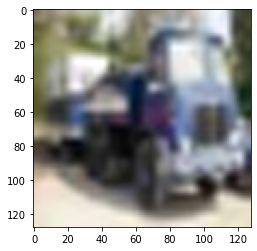

In [ ]:
test = dataset[57]
plt.imshow(test)

In [ ]:
predictions = model.predict(np.array([test]))
predictions 
# 0 = non_garments
# 1 = garments

array([[0.9876528 , 0.01234719]], dtype=float32)

# **Model to identify garment gender**

In [ ]:
prop.head()

,sno,name,gender
0,1,img_1,female
1,2,img_2,female
2,3,img_3,female
3,4,img_4,male
4,5,img_5,male


In [ ]:
garment_ds.shape

(200, 128, 128, 3)

In [ ]:
garment_ds_gender = []
for gender in prop.gender:
  if(gender=='male'):
    garment_ds_gender.append(0) #male
  else:
    garment_ds_gender.append(1) #female

garment_ds_gender = np.array(garment_ds_gender)
garment_ds_gender.shape

(200,)

(<matplotlib.image.AxesImage at 0x7f5c17572e90>, 1)

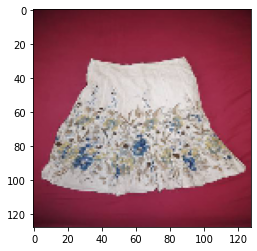

In [ ]:
plt.imshow(garment_ds[122]), garment_ds_gender[122] # 1 below indicates female

In [ ]:
garment_ds=garment_ds/225
garment_ds_gender_one_hot = to_categorical(garment_ds_gender)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (5,5), activation='relu', input_shape=(128,128,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(32, (5,5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [ ]:
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(garment_ds, garment_ds_gender_one_hot, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
3/3 [==============================] - 7s 2s/step - loss: 1.4478 - accuracy: 0.4944 - val_loss: 0.8200 - val_accuracy: 0.3000
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 0.7280 - accuracy: 0.5833 - val_loss: 0.7586 - val_accuracy: 0.3000
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 0.6630 - accuracy: 0.5722 - val_loss: 0.7990 - val_accuracy: 0.3000
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 0.6556 - accuracy: 0.5833 - val_loss: 0.7020 - val_accuracy: 0.3500
Epoch 5/5
3/3 [==============================] - 6s 2s/step - loss: 0.6330 - accuracy: 0.6500 - val_loss: 0.7445 - val_accuracy: 0.3500


**Manual Testing:**

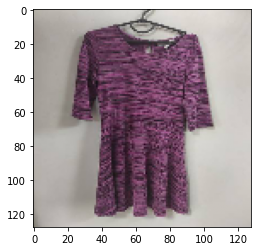

In [ ]:
new_img = plt.imread('/content/test/test_22.jpg')
test=cv2.resize(new_img, (128,128), interpolation=cv2.INTER_CUBIC)
test = test/255
plt.imshow(test)

In [ ]:
predictions = model2.predict(np.array([test]))
predictions 
# 0 = male
# 1 = female

array([[0.40635023, 0.59364974]], dtype=float32)

**A recommendation system:** (for similar images)

In [ ]:
def mse(imageA, imageB):
	err = np.sum((imageA - imageB).astype("float") ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [ ]:
def recommend(image):
  # image = image/225
  image_from_ds = []
  mse_value = []
  for i in range(200):
    image_from_ds.append(i)
    mse_value.append(mse(image, garment_ds[i]))

  df = pd.DataFrame({'image_from_ds':image_from_ds, 'mse_value':mse_value})
  sorted_df = df.sort_values(by=['mse_value'])
  return sorted_df.head()

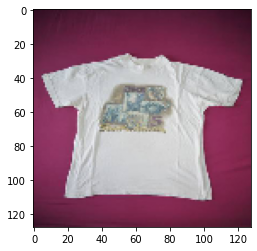

In [ ]:
new_img = plt.imread('/content/test/test_5.jpg')
test=cv2.resize(new_img, (128,128), interpolation=cv2.INTER_CUBIC)
test = test/255
plt.imshow(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


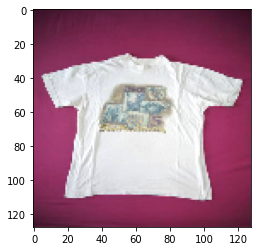

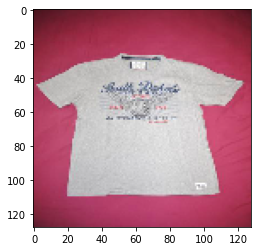

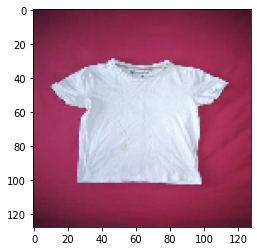

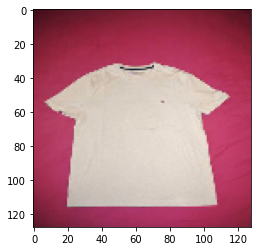

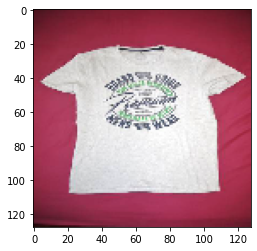

In [ ]:
df = recommend(test)
for i in df.image_from_ds:
  plt.figure()
  plt.imshow(garment_ds[i])